In [1]:
import pandas as pd
import numpy as np
import random
import os
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Download latest version
dataset_path = kagglehub.dataset_download("paramaggarwal/fashion-product-images-small")

print("Path to dataset files:", dataset_path)

100%|██████████| 565M/565M [00:55<00:00, 10.6MB/s] 

Extracting files...


Path to dataset files: /Users/lrx413/.cache/kagglehub/datasets/paramaggarwal/fashion-product-images-small/versions/1


In [5]:
print(os.listdir(dataset_path))

['images', 'myntradataset', 'styles.csv']


In [3]:
metadata_path = os.path.join(dataset_path, "styles.csv")
print(metadata_path)  # Verify the full path
styles_df = pd.read_csv(metadata_path, on_bad_lines='skip')  # Skip problematic lines
print(styles_df.head())

/Users/lrx413/.cache/kagglehub/datasets/paramaggarwal/fashion-product-images-small/versions/1/styles.csv
      id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName  
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  
1  2012.0  Casual             Peter England Men Party Blue Jeans  
2  2016.0  Casual                       Titan Women Silver Watch  
3  2011.0  Casual  Manchester United Men Solid Black Track Pants  
4  2012.0  Casual                          Puma Men Grey T-shirt  


In [16]:
print("Missing Values:")
print(styles_df.isnull().sum())

Missing Values:
id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64


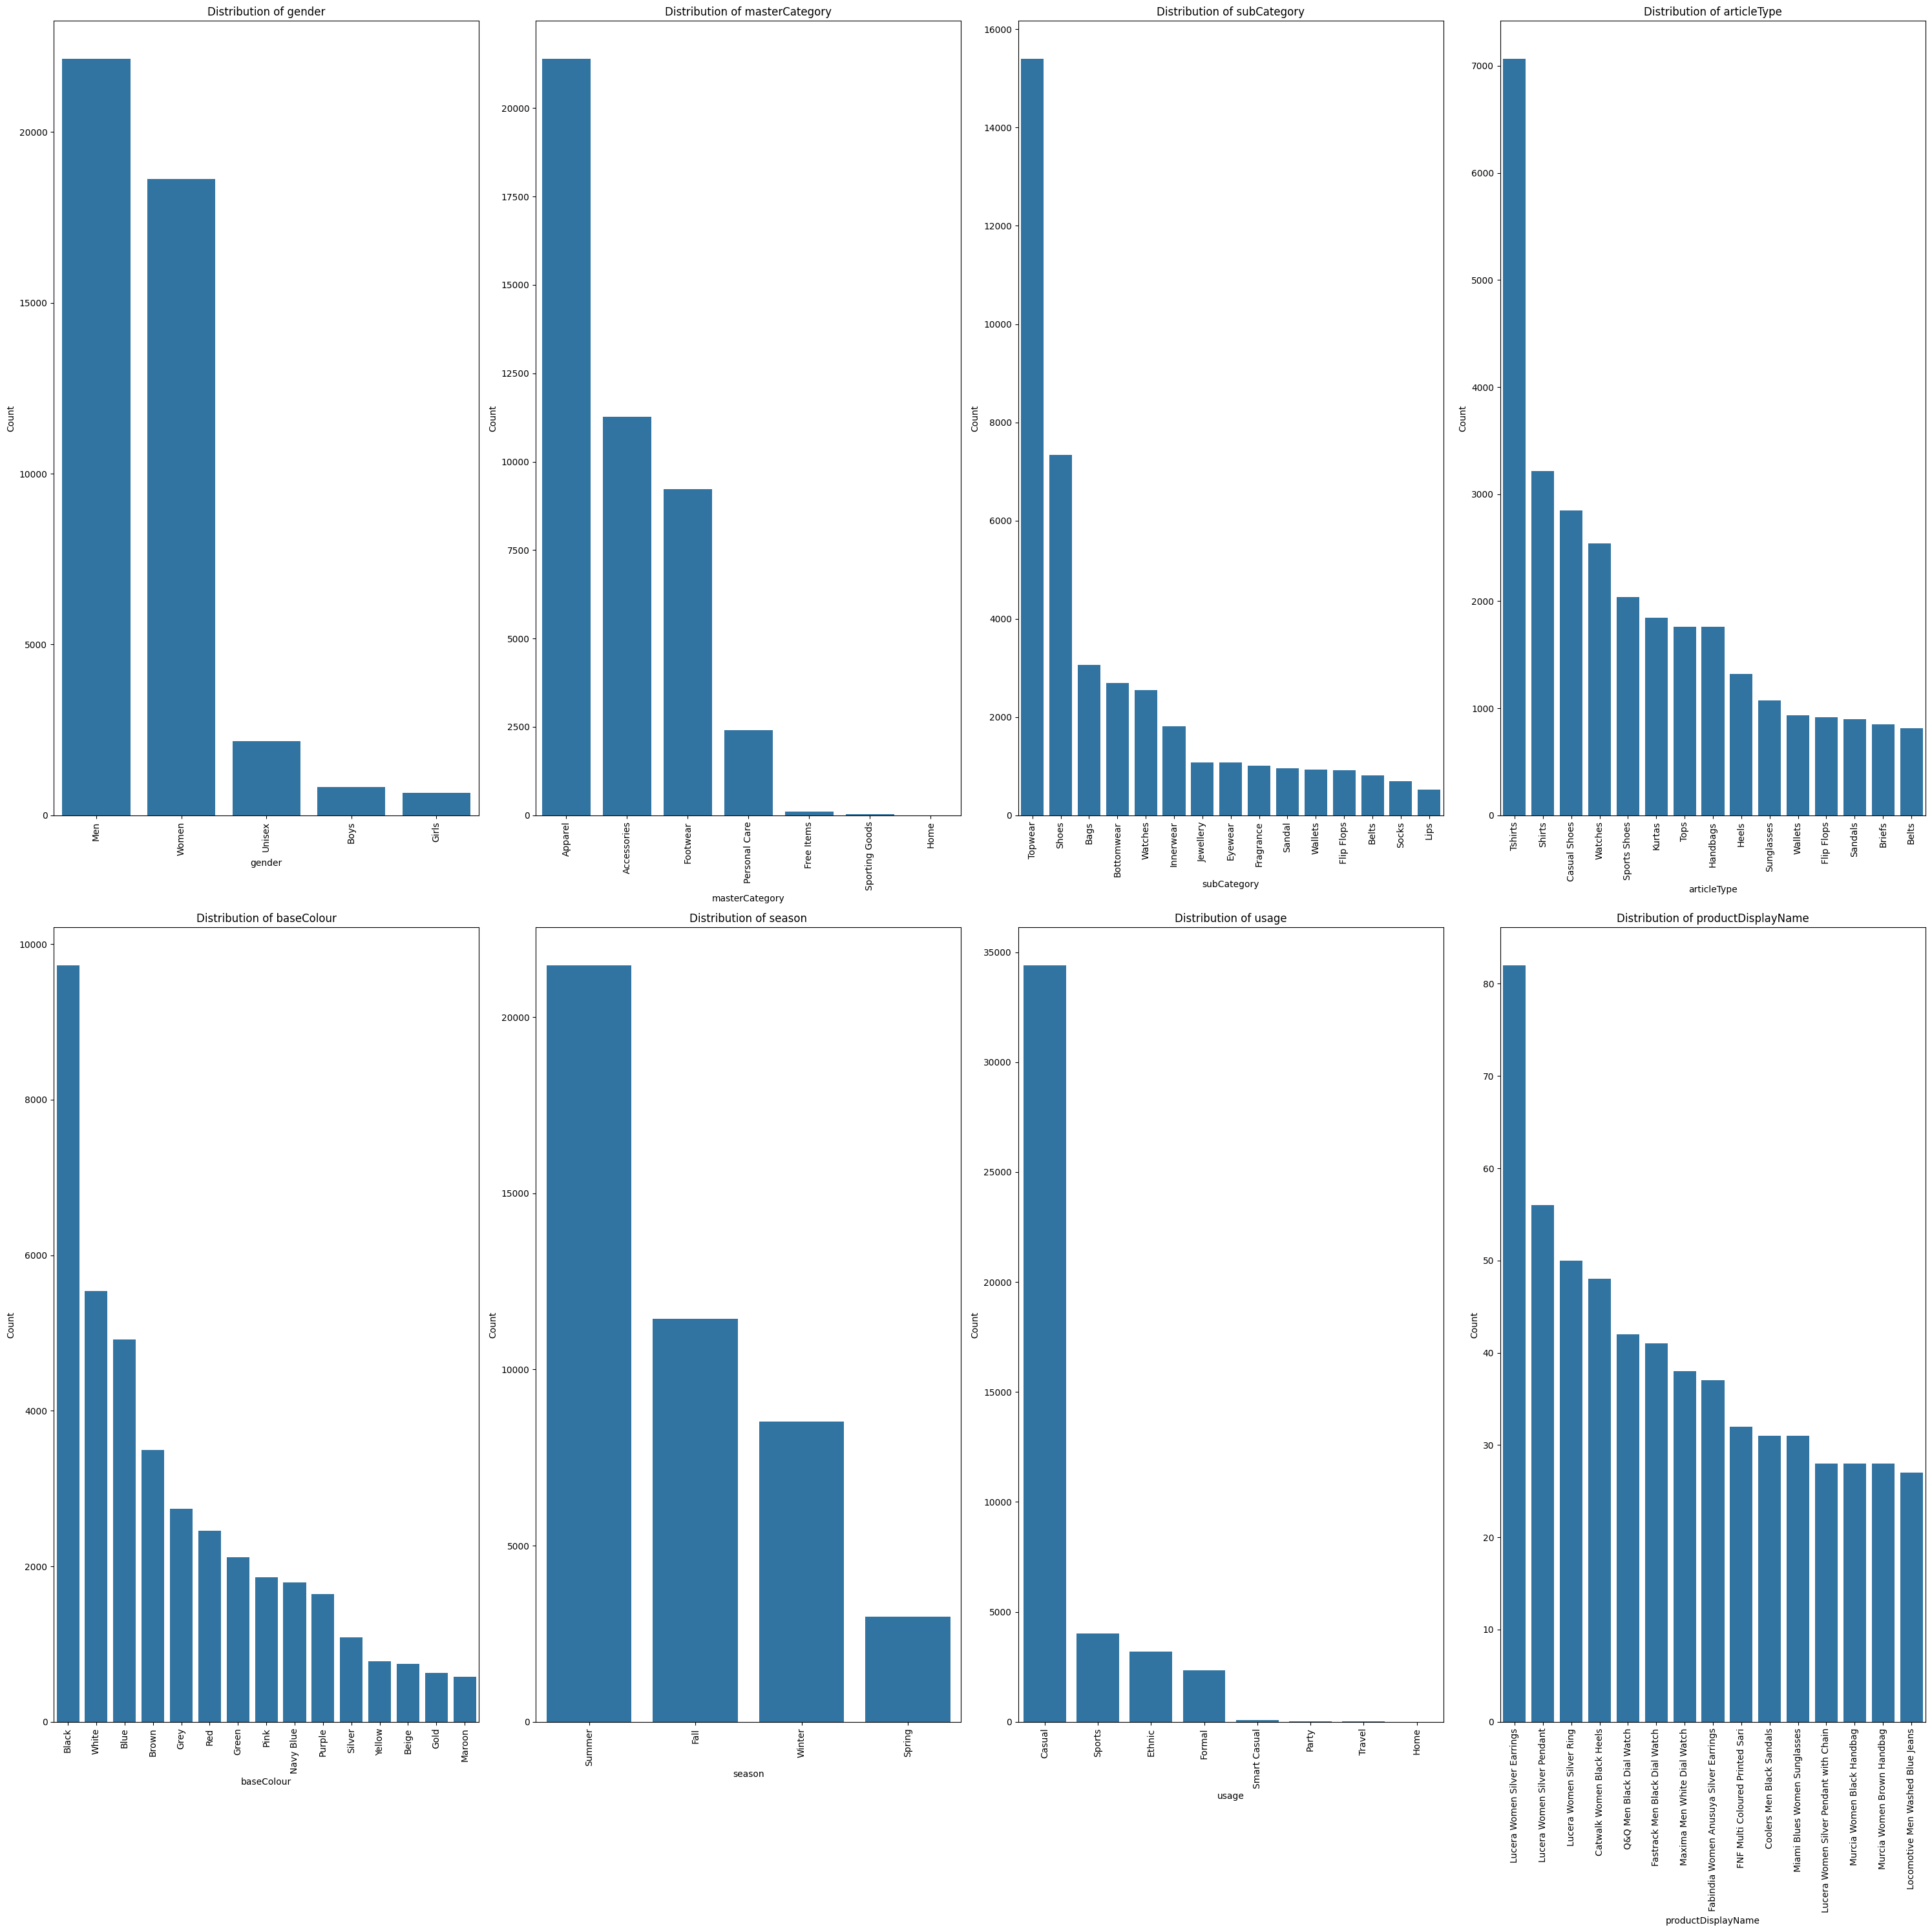

In [17]:
categorical_cols = styles_df.select_dtypes(include=["object"]).columns.tolist()

# Distribution of categorical columns in data
fig, ax = plt.subplots(nrows = 2, ncols=4, figsize=(30, 30))
ax = ax.flatten()

for i, col in enumerate(categorical_cols):
    value_counts = styles_df[col].value_counts().sort_values(ascending=False).head(15)
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax[i])
    ax[i].set_title(f'Distribution of {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel("Count")
    ax[i].tick_params(axis="x", rotation=90)
plt.tight_layout()
plt.show()

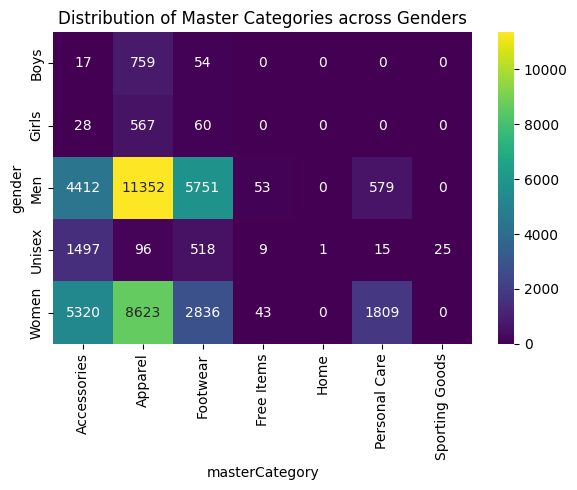

In [6]:
# correlation between gender, masterCategory
plt.figure(figsize=(6, 5))
# crosstab of gender vs masterCategory
gender_category = pd.crosstab(styles_df['gender'], styles_df['masterCategory'])
sns.heatmap(gender_category, annot=True, cmap='viridis', fmt='d')
plt.title('Distribution of Master Categories across Genders')
plt.tight_layout()

<Figure size 1200x600 with 0 Axes>

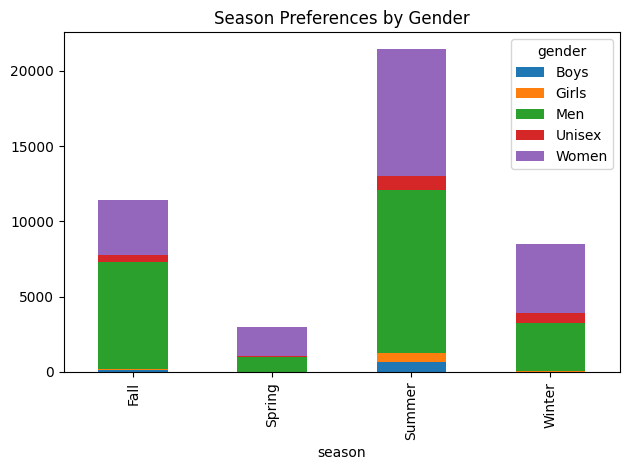

In [7]:
# Season preferences by gender
plt.figure(figsize=(12, 6))
season_gender = pd.crosstab(styles_df['season'], styles_df['gender'])
season_gender.plot(kind='bar', stacked=True)
plt.title('Season Preferences by Gender')
plt.tight_layout()

<Figure size 1400x800 with 0 Axes>

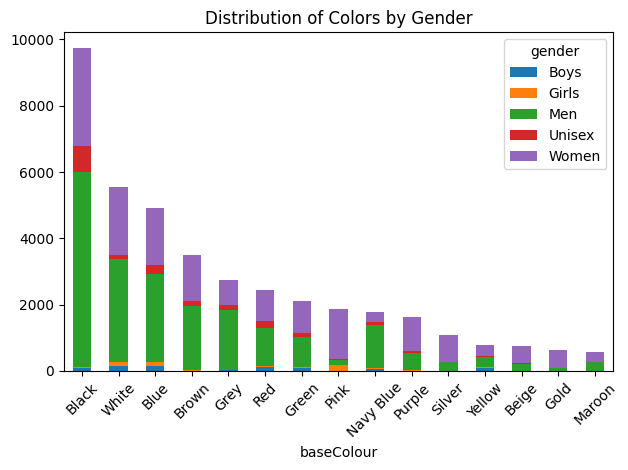

In [8]:
# Distribution of colors by gender
plt.figure(figsize=(14, 8))
color_gender = pd.crosstab(styles_df['baseColour'], styles_df['gender'])
# Display only top 15 colors
color_gender = color_gender.loc[color_gender.sum(axis=1).sort_values(ascending=False).head(15).index]
color_gender.plot(kind='bar', stacked=True)
plt.title('Distribution of Colors by Gender')
plt.xticks(rotation=45)
plt.tight_layout()

NameError: name 'px' is not defined

# text

In [10]:
metadata_path = os.path.join(dataset_path, "styles.csv")
print(metadata_path)  # Verify the full path
data = pd.read_csv(metadata_path, on_bad_lines='skip')  # Skip problematic lines
print(data.head())

/home/codespace/.cache/kagglehub/datasets/paramaggarwal/fashion-product-images-small/versions/1/styles.csv
      id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName  
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  
1  2012.0  Casual             Peter England Men Party Blue Jeans  
2  2016.0  Casual                       Titan Women Silver Watch  
3  2011.0  Casual  Manchester United Men Solid Black Track Pants  
4  2012.0  Casual                          Puma Men Grey T-shirt  


In [40]:
# Clean missing values
data.dropna(subset=['gender', 'masterCategory', 'baseColour'], inplace=True)
data['baseColour'] = data['baseColour'].fillna('Unknown')

# Standardize column names
data.columns = [col.strip().lower() for col in data.columns]

# Check unique values for key features
print("\nUnique values in gender:", data['gender'].unique())
print("Unique values in season:", data['season'].unique())
print("Unique values in usage:", data['usage'].unique())


Unique values in gender: ['Men' 'Women' 'Boys' 'Girls' 'Unisex']
Unique values in season: ['Fall' 'Summer' 'Winter' 'Spring' nan]
Unique values in usage: ['Casual' 'Ethnic' 'Formal' 'Sports' nan 'Smart Casual' 'Travel' 'Party'
 'Home']


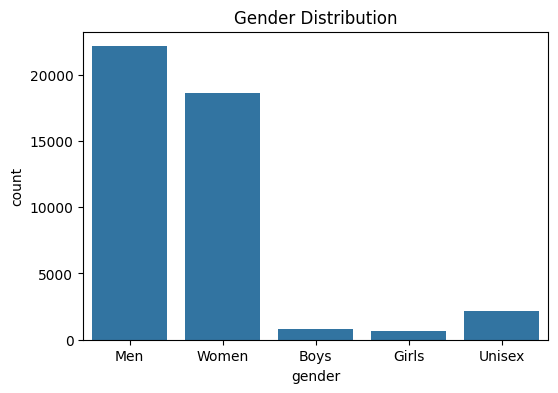

In [41]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='gender')
plt.title('Gender Distribution')
plt.show()


In [44]:
data.columns

Index(['id', 'gender', 'mastercategory', 'subcategory', 'articletype',
       'basecolour', 'season', 'year', 'usage', 'productdisplayname'],
      dtype='object')

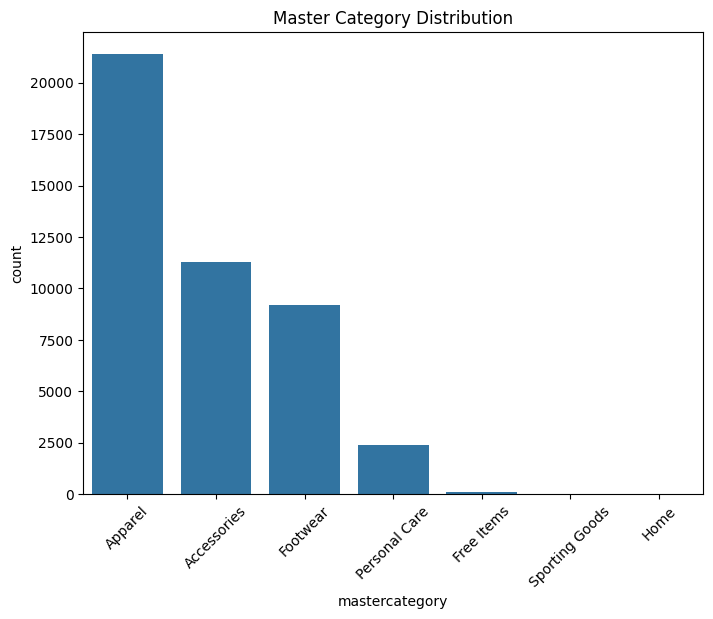

In [45]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='mastercategory', order=data['mastercategory'].value_counts().index)
plt.title('Master Category Distribution')
plt.xticks(rotation=45)
plt.show()


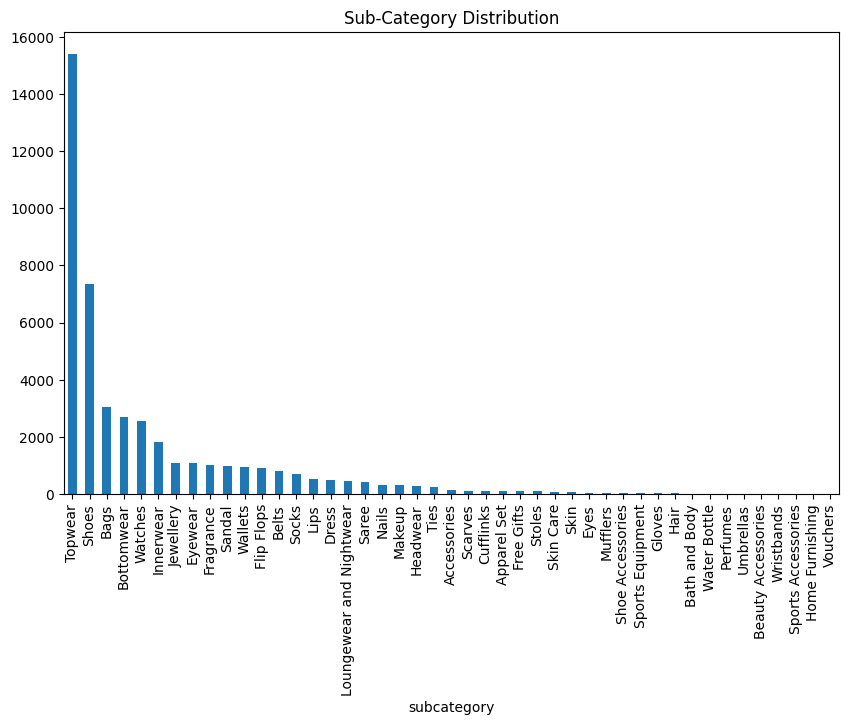

In [47]:
plt.figure(figsize=(10, 6))
data['subcategory'].value_counts().plot(kind='bar')
plt.title('Sub-Category Distribution')
plt.show()


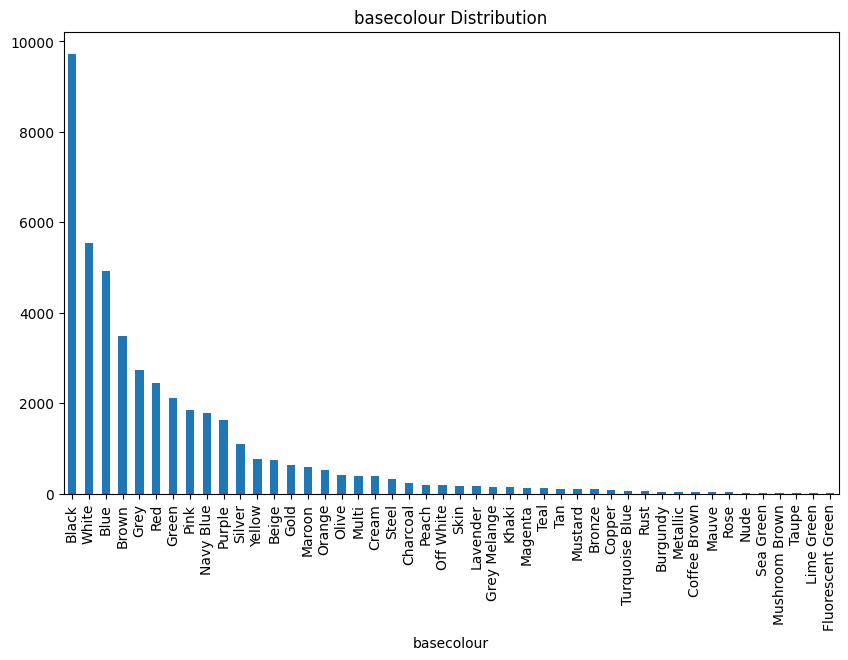

In [50]:
plt.figure(figsize=(10, 6))
data['basecolour'].value_counts().plot(kind='bar')
plt.title('basecolour Distribution')
plt.show()

# images

In [16]:
image_path = os.path.join(dataset_path, "images")
print(image_path)

/home/codespace/.cache/kagglehub/datasets/paramaggarwal/fashion-product-images-small/versions/1/images


In [3]:
def plot_head_5_image(col):
    for category in data[col].unique():
        fig, axs = plt.subplots(1, 5, figsize = (15, 10))
        for i, ax in zip(data[data[col] == category]['id'][:5], axs.ravel()):
            jpg_path = f'{image_path}/{str(i)}.jpg'
            images = plt.imread(jpg_path)
            ax.imshow(images, cmap = 'gray')
            ax.set_title(f'{category}:{i}')
    plt.show() #根據指定的列名（col），繪製出每個類別的前五張圖片

In [32]:
use_cols = ['gender', 'season', 'usage']

gender


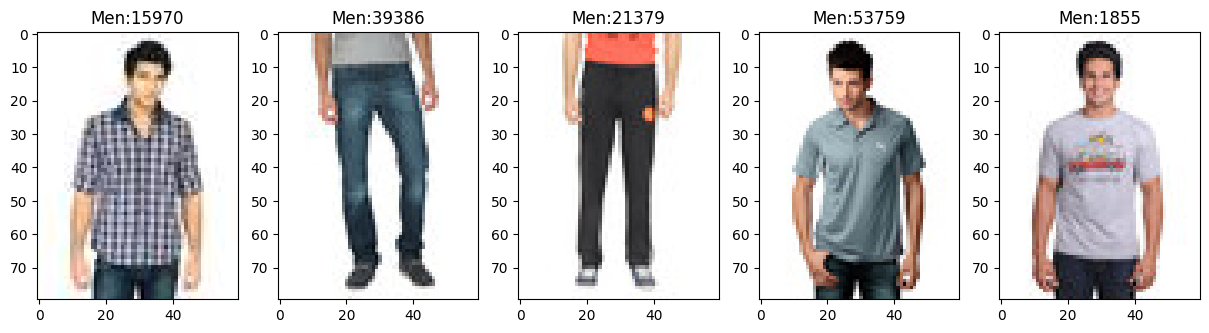

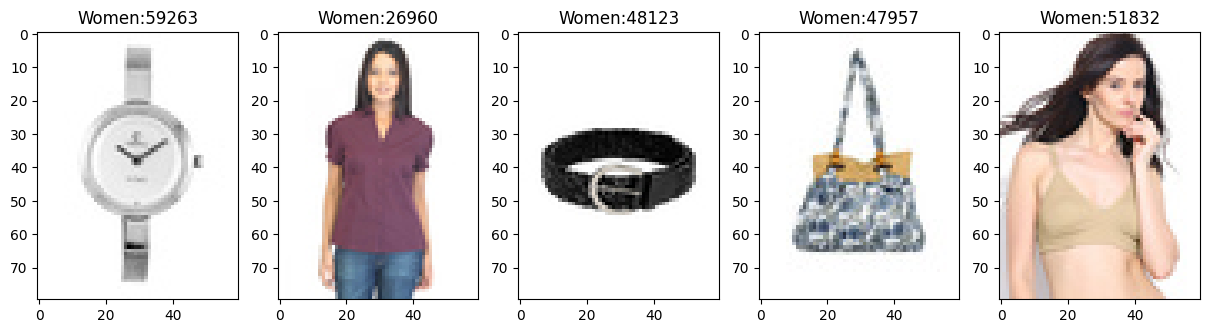

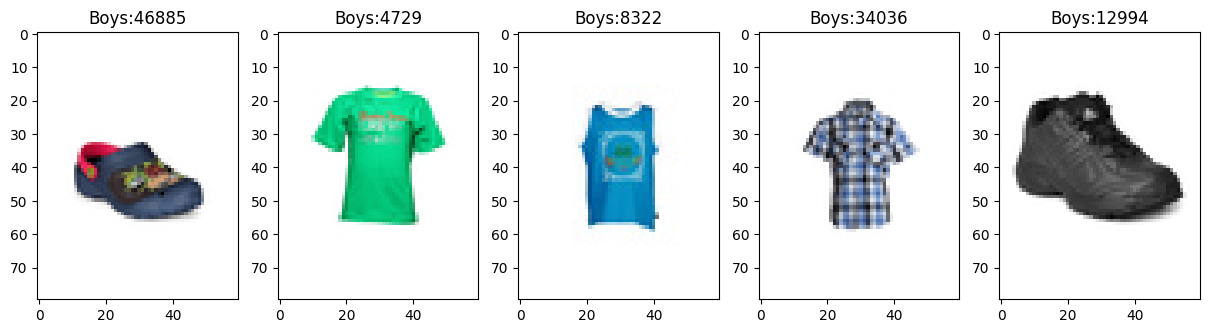

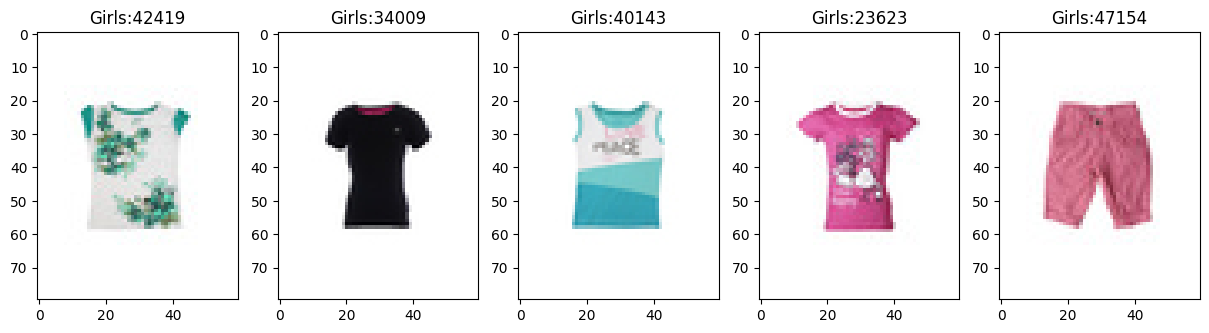

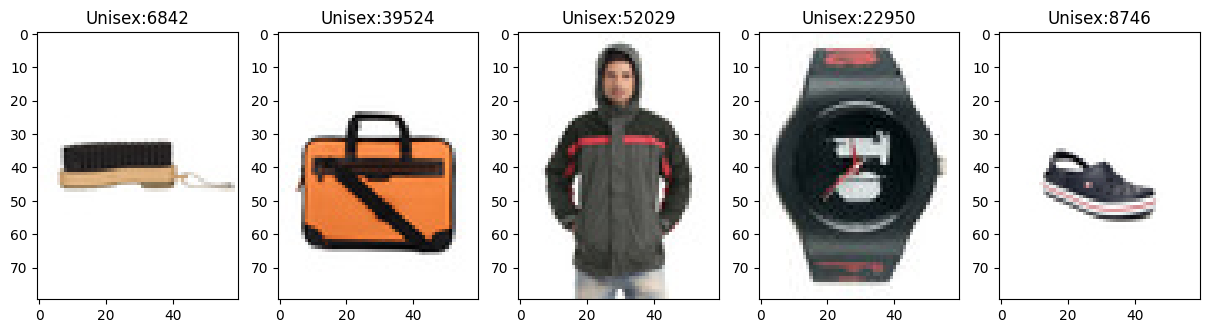

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
season


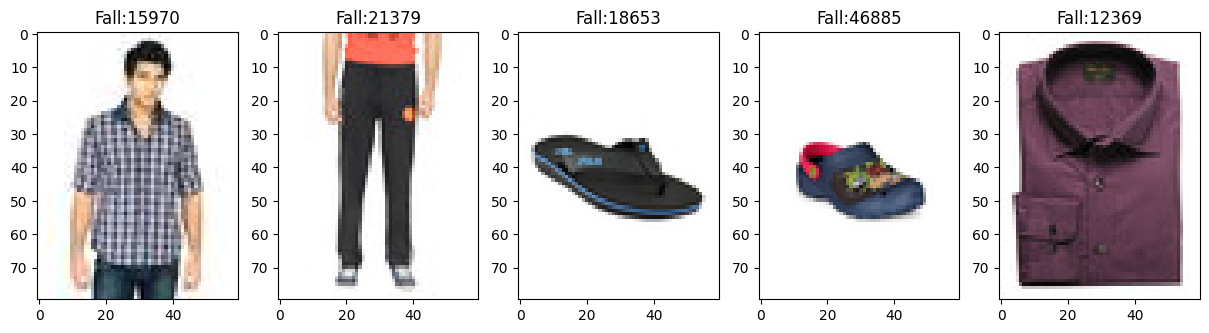

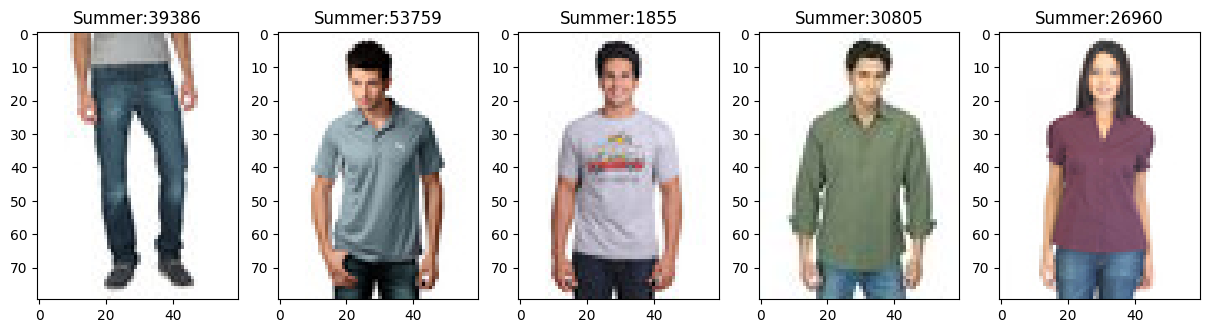

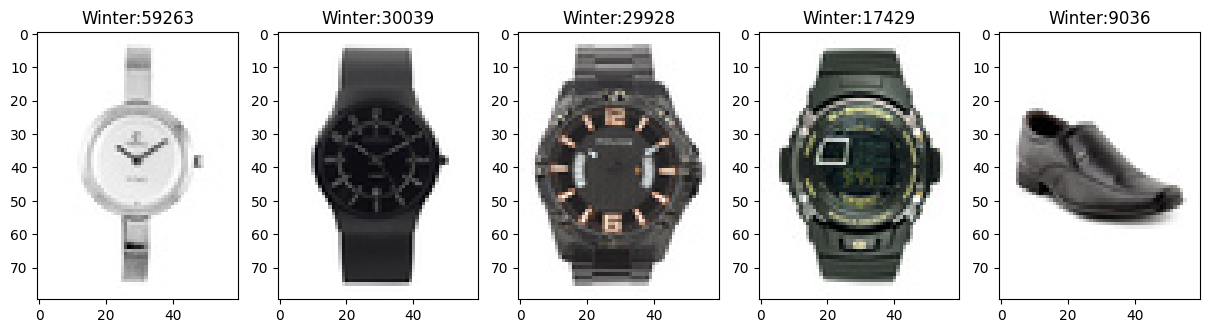

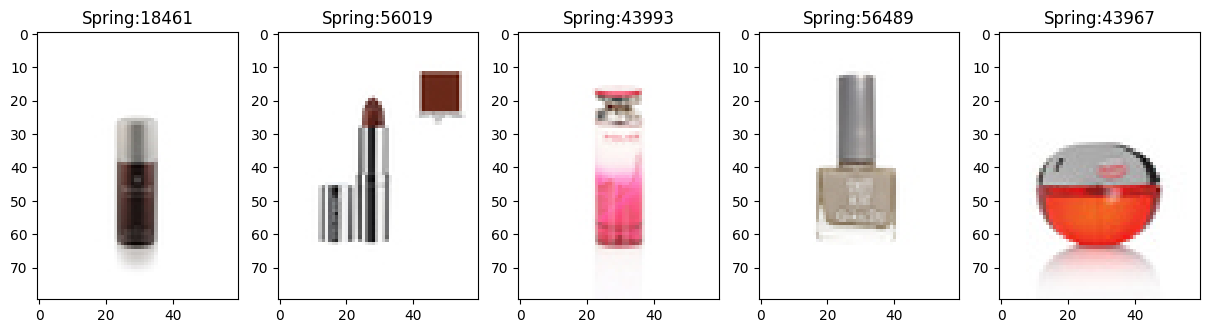

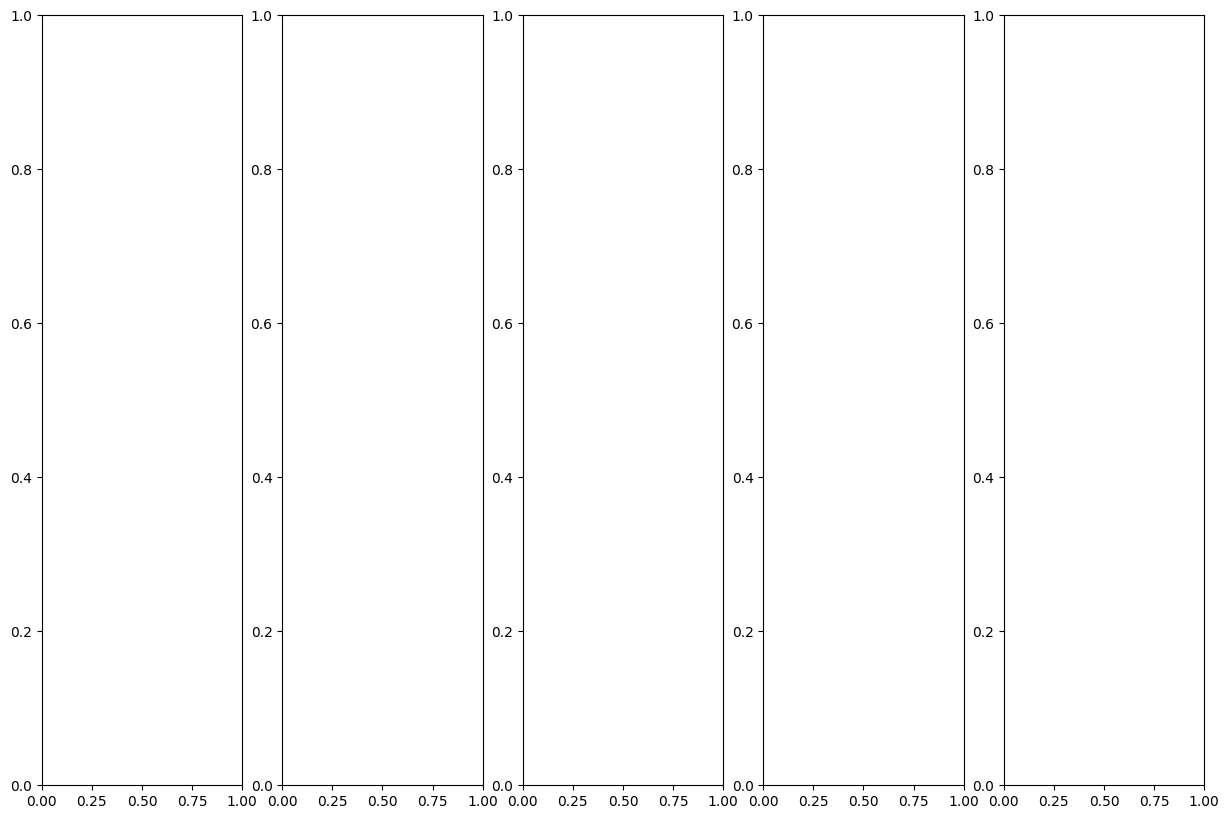

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
usage


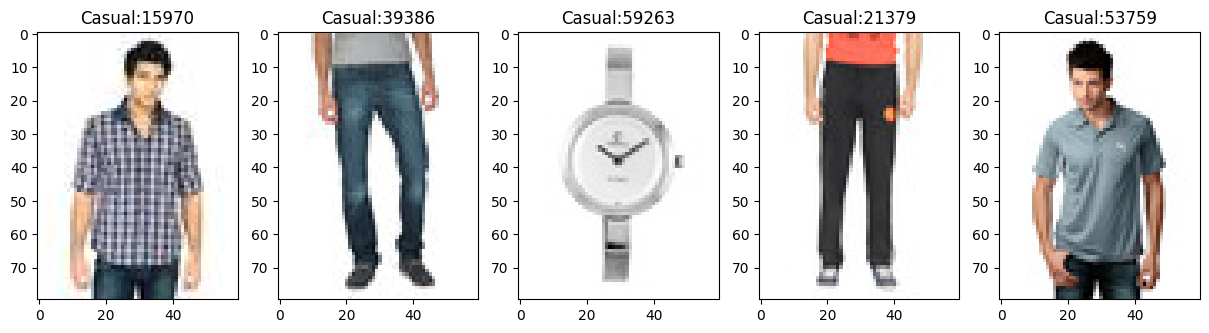

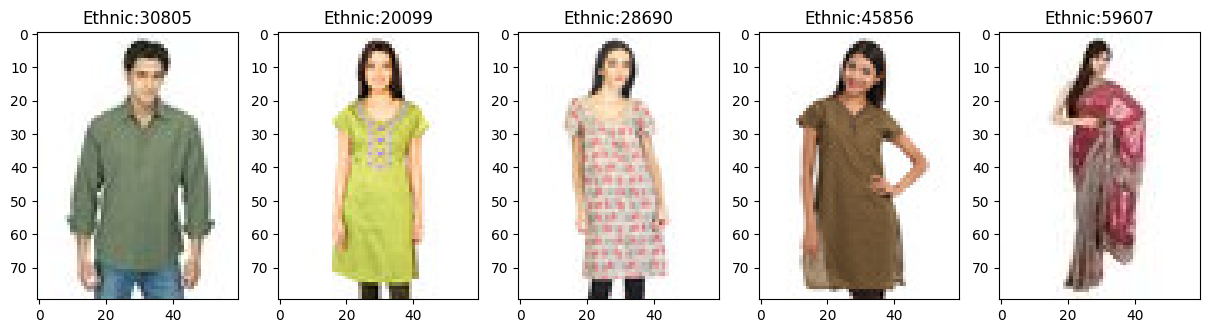

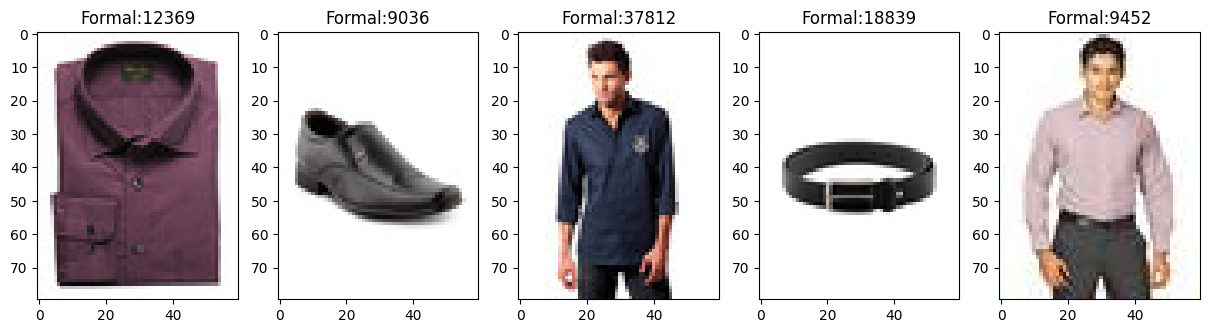

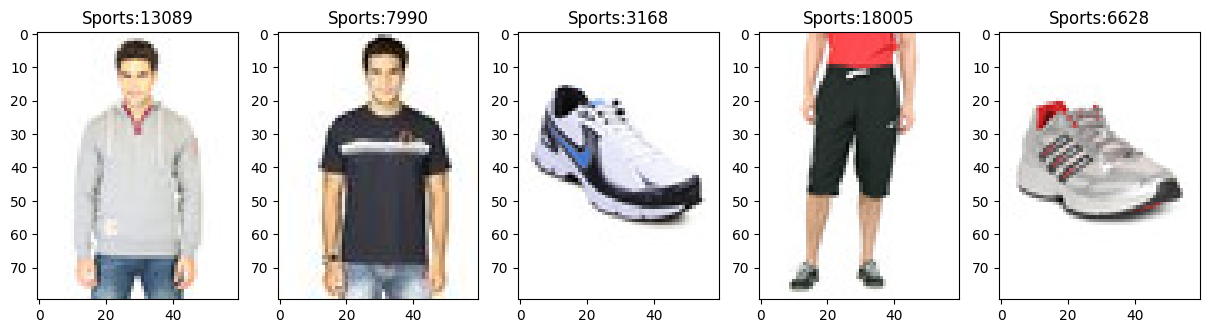

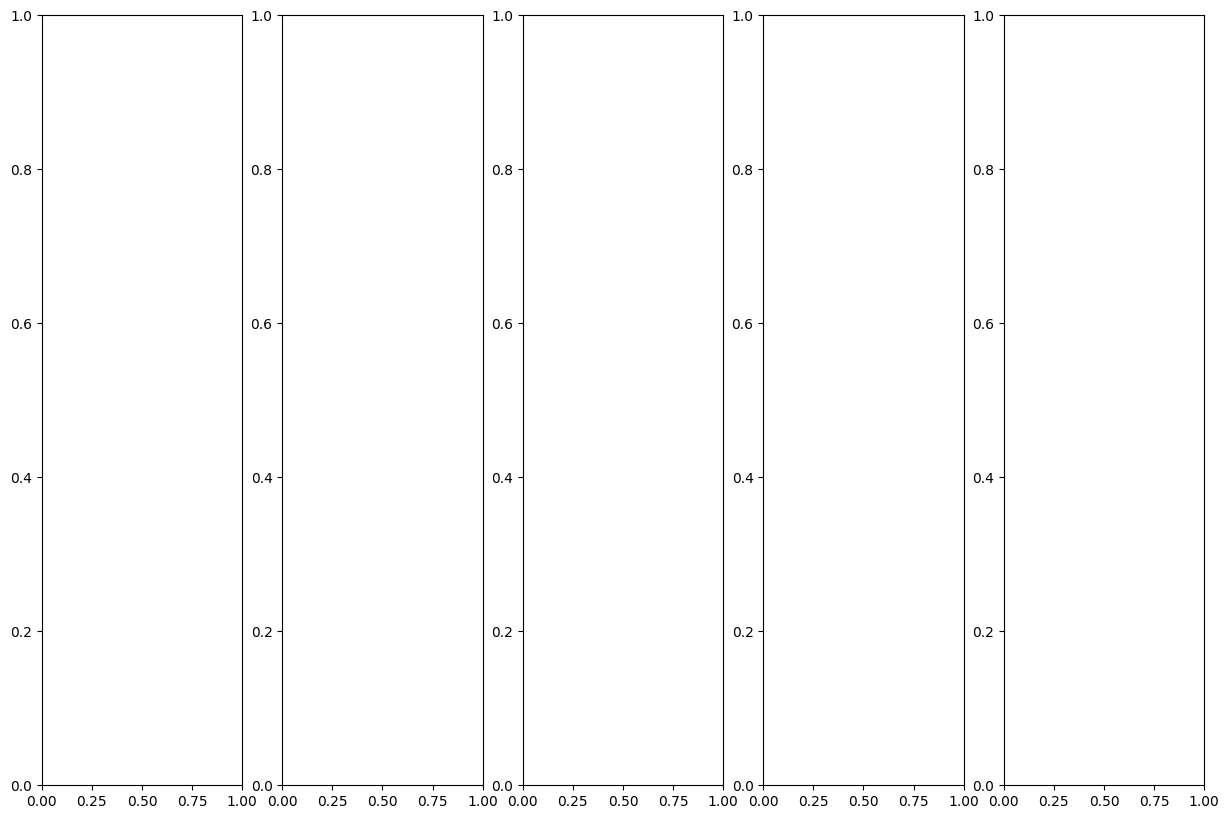

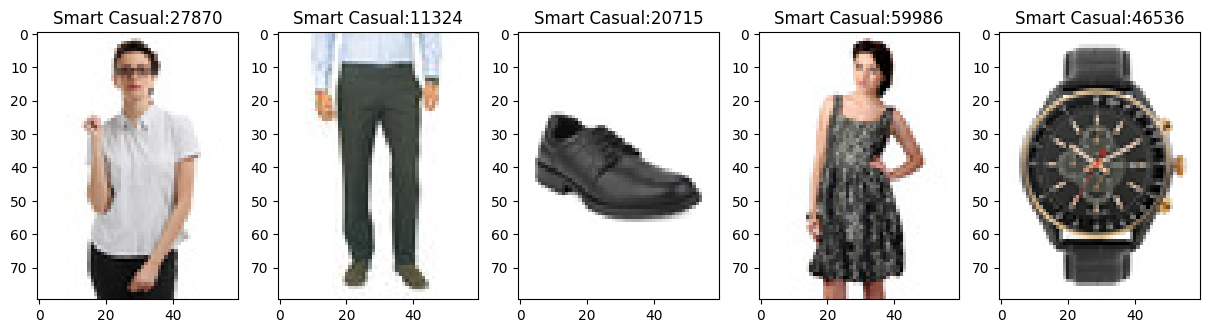

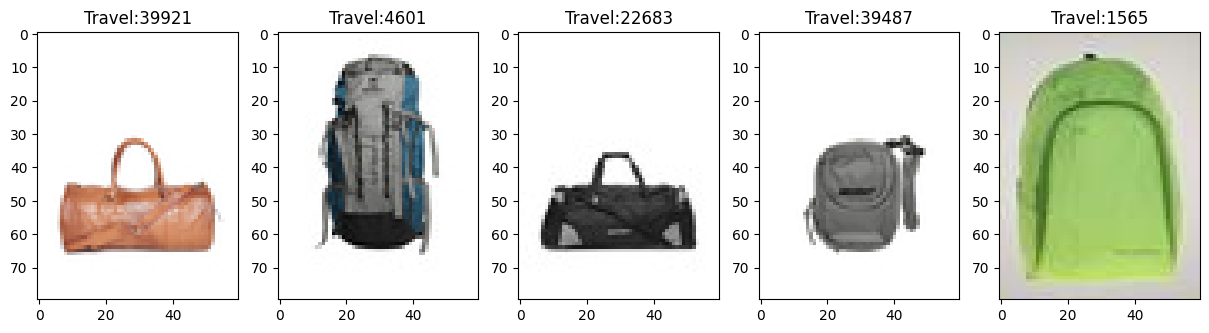

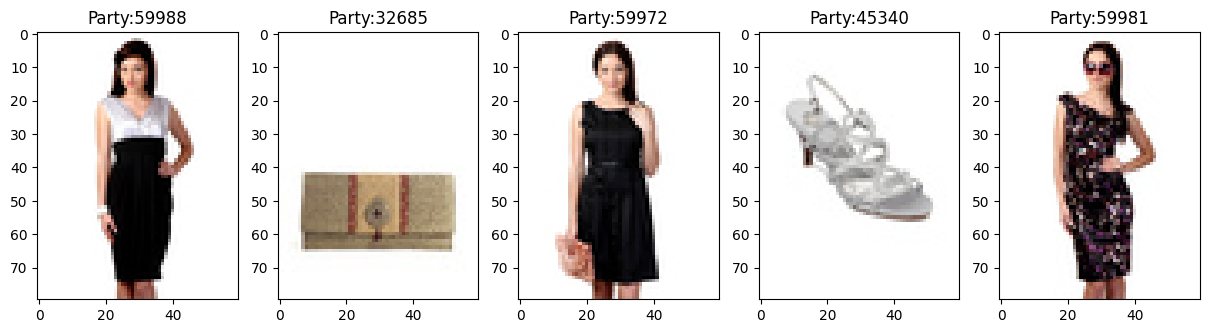

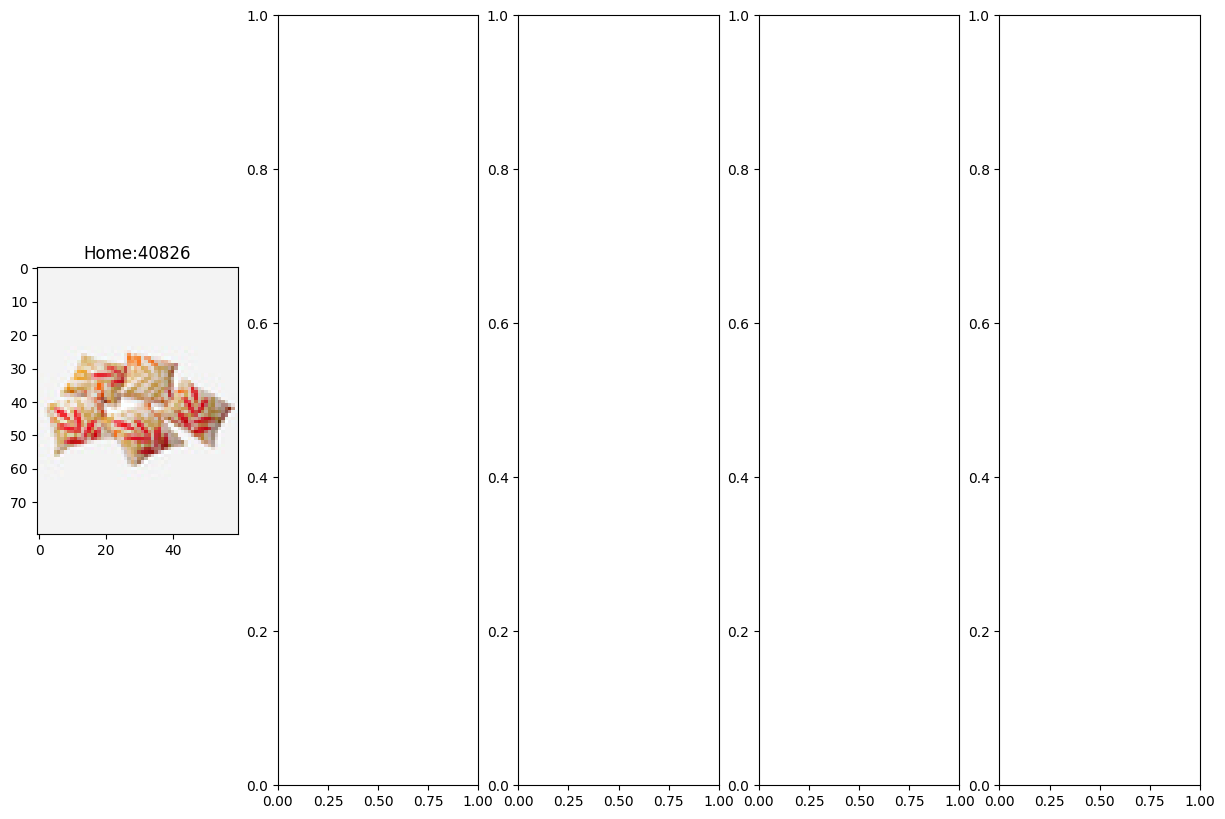

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [33]:
for col in use_cols:
    print(col)
    plot_head_5_image(col)
    print('-' * 300)

In [1]:
!pip install swifter
!pip install tensorflow==2.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 47.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 54.0 MB/s eta 0:00:00:00:01
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16559 sha256=fb76f232f1c6793fc2bc43fcd47a8536eca6410023676e52fafaaa880c194a7c
  Stored in directory: /home/codespace/.cache/pip/wheels/d9/31/ff/ff51141a088571a9f672449e5aad5ea8bb35ca5d95ba135f30
Successfully built swifter

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement tensorflow==2.0.0 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import matplotlib.image as mpimg
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os # accessing directory structure

Use ResNet50 embeddings

In [1]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.layers import GlobalMaxPooling2D
tf.__version__

2025-03-05 20:13:13.747465: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-05 20:13:13.972897: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-05 20:13:14.146741: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741205594.569918    6286 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741205594.626211    6286 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-05 20:13:15.333942: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

'2.18.0'

In [7]:
# Load ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False)
base_model.trainable = False

# Add pooling layer to flatten features
model = tf.keras.Sequential([
    base_model,
    GlobalMaxPooling2D()
])

model.summary()


2025-03-05 20:17:45.302703: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, None, None,     │    23,587,712 │
│                                 │ 2048)                  │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 2048)           │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [8]:
def get_embedding(model, img_path):
    # Load and preprocess image
    img = image.load_img(img_path, target_size=(224, 224))  # Resize to 224x224
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Predict embedding
    embedding = model.predict(img_array).reshape(-1)
    return embedding


https://www.kaggle.com/code/pulupumithai/fashion-outfit-recommendation-based-on-skin-tone

In [ ]:
embeddings = []
# Ensure the image filename column
data["image_name"] = data["id"].astype(str) + ".jpg"  # Assuming images are stored as {id}.jpg
data["image_path"] = os.path.join(image_path, data["image_name"])

# Extract embeddings using parallel processing
map_embeddings = data["image_path"].swifter.apply(lambda img_path: get_embedding(model, img_path))
embeddings_df = map_embeddings.apply(pd.Series)  # Convert embeddings to DataFrame

# Convert to DataFrame

embeddings_df.to_csv("image_embeddings.csv", index=False)

print("Embeddings saved to image_embeddings.csv")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

FileNotFoundError: [Errno 2] No such file or directory: '/home/codespace/.cache/kagglehub/datasets/paramaggarwal/fashion-product-images-small/versions/1/images/39403.jpg'

In [19]:
embeddings_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,2.228650,6.758040,0.000000,1.157925,4.044768,4.190840,7.823343,8.598868,1.214281,0.000000,...,1.759052,5.455352,2.264870,22.648237,0.318426,0.000000,9.307670,2.485374,2.589478,18.344507
1,2.160767,13.004471,0.092260,6.950658,5.372176,0.000000,15.559410,2.178859,0.848541,0.146077,...,2.459627,8.469250,5.472925,8.990244,3.187698,0.256656,7.267735,0.000000,6.571849,17.669720
2,0.000000,2.099401,1.121330,5.048748,2.971097,4.301222,3.864699,1.902126,0.494962,4.596427,...,0.000000,16.961674,2.302291,1.838041,0.741311,0.000000,2.888042,2.204803,5.722481,6.089292
3,0.000000,5.336298,1.670132,11.411594,1.258603,0.000000,12.816564,7.772422,0.845032,2.947619,...,29.042675,1.647542,0.176537,0.000000,6.040602,1.806872,10.376255,0.000000,16.299782,16.499521
4,2.663741,15.295507,0.032797,2.476941,6.908781,2.586337,9.054920,7.316332,0.000000,0.000000,...,2.014318,6.502687,3.596583,19.685736,6.044685,0.000000,8.757936,2.211979,4.258553,17.862125


In [11]:
data.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


COSINE SIMILARITY

In [26]:
from sklearn.metrics.pairwise import pairwise_distances

# Calcule DIstance Matriz
cosine_sim = 1-pairwise_distances(embeddings_df, metric='cosine')
cosine_sim[:4, :4]

array([[1.        , 0.63644904, 0.4960258 , 0.5943887 ],
       [0.63644904, 1.        , 0.50978404, 0.73752284],
       [0.4960258 , 0.50978404, 1.        , 0.47131705],
       [0.5943887 , 0.73752284, 0.47131705, 0.99999905]], dtype=float32)

Similar products Recommender

In [27]:
indices = pd.Series(range(len(data)), index=data.index)
indices

# Function that get movie recommendations based on the cosine similarity score of movie genres
def get_recommender(idx, data, top_n = 5):
    sim_idx    = indices[idx]
    sim_scores = list(enumerate(cosine_sim[sim_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    idx_rec    = [i[0] for i in sim_scores]
    idx_sim    = [i[1] for i in sim_scores]
    
    return indices.iloc[idx_rec].index, idx_sim
n=int(input("Choose your id in between 0 to 4999:"))
get_recommender(n, data, top_n = 5)

(Index([5705, 3259, 6041, 4951, 6687], dtype='int64'),
 [np.float32(0.8693842),
  np.float32(0.8652493),
  np.float32(0.8648538),
  np.float32(0.86450493),
  np.float32(0.8627756)])

In [36]:
# Idx Item to Recommender
idx_ref = n

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, data, top_n = 6)


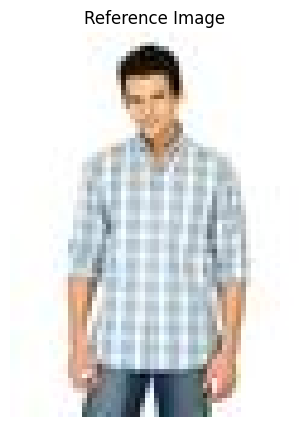

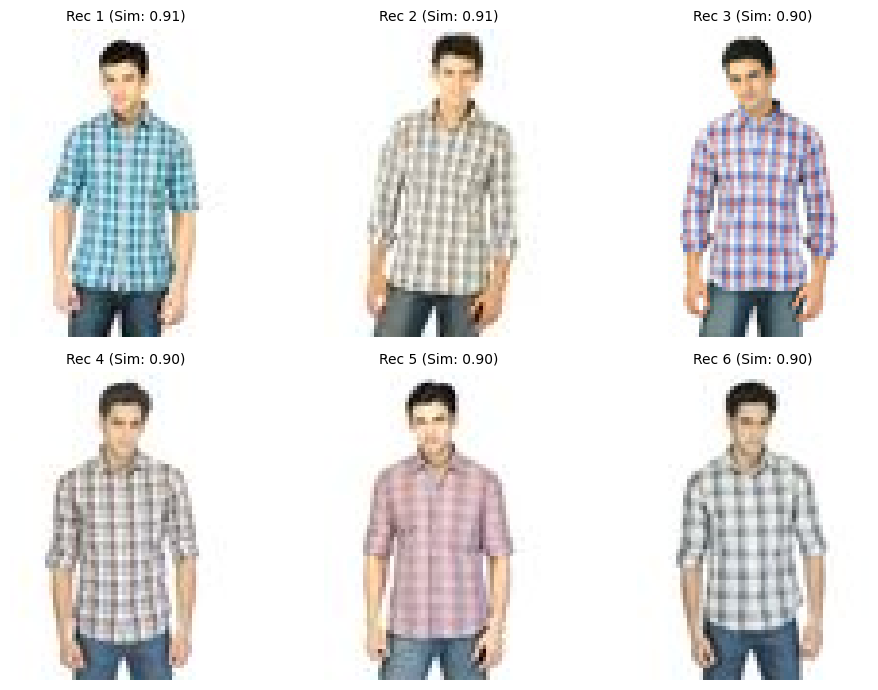

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os

# Function to load an image using PIL
def load_image(img_path):
    if os.path.exists(img_path):
        img = Image.open(img_path).convert("RGB")  # Open image and convert to RGB
        return img
    else:
        print(f"Warning: Image not found at {img_path}")
        return Image.new("RGB", (224, 224), (0, 0, 0))  # Return black placeholder

# Function to plot images in a grid
def plot_figures(figures, rows=2, cols=3):
    fig, axes = plt.subplots(rows, cols, figsize=(10, 7))
    axes = axes.flatten()
    
    for i, (key, img) in enumerate(figures.items()):
        axes[i].imshow(img)
        axes[i].set_title(key, fontsize=10)
        axes[i].axis("off")
    
    plt.tight_layout()
    plt.show()

# Generate index mapping
indices = pd.Series(range(len(data)), index=data.index)

# Function to get recommendations
def get_recommender(idx, df, top_n=5):
    sim_idx = indices[idx]
    sim_scores = list(enumerate(cosine_sim[sim_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]

    idx_rec = [i[0] for i in sim_scores]
    idx_sim = [i[1] for i in sim_scores]

    return df.iloc[idx_rec]["image_path"], idx_sim  # Return image paths

# Select an item for recommendations
idx_ref = 2993

# Get recommendations
recommended_images, similarity_scores = get_recommender(idx_ref, data, top_n=6)

# Plot reference image
plt.figure(figsize=(5, 5))
plt.imshow(load_image(data.iloc[idx_ref]["image_path"]))
plt.title("Reference Image")
plt.axis("off")
plt.show()

# Generate dictionary of recommended images
figures = {f"Rec {i+1} (Sim: {sim:.2f})": load_image(img_path)
           for i, (img_path, sim) in enumerate(zip(recommended_images, similarity_scores))}

# Plot recommended images (2 rows, 3 columns)
plot_figures(figures, 2, 3)
